In [1]:
import os

import numpy as np

import pandas as pd
pd.set_option('display.max_rows', 30)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 30)

import statsmodels.api as sm
import statsmodels.formula.api as smf

import seaborn as sns


import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import scipy.stats as stats

from sklearn import feature_selection, linear_model

from statsmodels.tools.eval_measures import rmse
from sklearn import metrics 

/Users/andrewyu/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv('../datasets/dataset-conversion.csv')

In [3]:
df.columns

Index([u'ID', u'new_user', u'country', u'age', u'source', u'pages_visited',
       u'converted'],
      dtype='object')

In [4]:
df

,ID,new_user,country,age,source,pages_visited,converted
0,1,Yes,USA,29.0,SEO,10.0,No
1,2,Yes,USA,25.0,ads,2.0,No
2,3,Yes,USA,29.0,SEO,4.0,No
3,4,Yes,USA,41.0,SEO,7.0,No
4,5,Yes,USA,38.0,SEO,2.0,No
5,6,Yes,GBR,39.0,SEO,1.0,No
6,7,Yes,CHN,23.0,SEO,6.0,No
7,8,Yes,CHN,21.0,direct,6.0,No
8,9,Yes,DEU,35.0,SEO,10.0,No
9,10,No,CHN,26.0,direct,1.0,No


In [5]:
df.converted.isnull().sum()

1942

In [6]:
df = df.dropna()
df

,ID,new_user,country,age,source,pages_visited,converted
0,1,Yes,USA,29.0,SEO,10.0,No
1,2,Yes,USA,25.0,ads,2.0,No
2,3,Yes,USA,29.0,SEO,4.0,No
3,4,Yes,USA,41.0,SEO,7.0,No
4,5,Yes,USA,38.0,SEO,2.0,No
5,6,Yes,GBR,39.0,SEO,1.0,No
6,7,Yes,CHN,23.0,SEO,6.0,No
7,8,Yes,CHN,21.0,direct,6.0,No
8,9,Yes,DEU,35.0,SEO,10.0,No
9,10,No,CHN,26.0,direct,1.0,No


### Lets try regularization (lesson 11)
To help find the most statistically significant features

In [7]:
# I wanna see how many unique vals
df.country.unique()

array(['USA', 'GBR', 'CHN', 'DEU'], dtype=object)

In [8]:
df.source.unique()

array(['SEO', 'ads', 'direct'], dtype=object)

In [9]:
# Time to one hot / convert things to binary

# https://stackoverflow.com/questions/40901770/is-there-a-simple-way-to-change-a-column-of-yes-no-to-1-0-in-a-pandas-dataframe
df['new_user'] = df['new_user'].map({'Yes': 1, 'No':0})
df

/Users/andrewyu/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,ID,new_user,country,age,source,pages_visited,converted
0,1,1,USA,29.0,SEO,10.0,No
1,2,1,USA,25.0,ads,2.0,No
2,3,1,USA,29.0,SEO,4.0,No
3,4,1,USA,41.0,SEO,7.0,No
4,5,1,USA,38.0,SEO,2.0,No
5,6,1,GBR,39.0,SEO,1.0,No
6,7,1,CHN,23.0,SEO,6.0,No
7,8,1,CHN,21.0,direct,6.0,No
8,9,1,DEU,35.0,SEO,10.0,No
9,10,0,CHN,26.0,direct,1.0,No


In [10]:
country_df = pd.get_dummies(df.country, prefix = "country")
country_df

,country_CHN,country_DEU,country_GBR,country_USA
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,0,0,1,0
6,1,0,0,0
7,1,0,0,0
8,0,1,0,0
9,1,0,0,0


In [11]:
source_df = pd.get_dummies(df.source, prefix = "source")
source_df

,source_SEO,source_ads,source_direct
0,1,0,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0
7,0,0,1
8,1,0,0
9,0,0,1


### Now add these to the df

In [12]:
df = df.join([country_df])
df = df.join([source_df])
df2 = df.drop(['country', 'source'], axis=1)
df2

,ID,new_user,age,pages_visited,converted,country_CHN,country_DEU,country_GBR,country_USA,source_SEO,source_ads,source_direct
0,1,1,29.0,10.0,No,0,0,0,1,1,0,0
1,2,1,25.0,2.0,No,0,0,0,1,0,1,0
2,3,1,29.0,4.0,No,0,0,0,1,1,0,0
3,4,1,41.0,7.0,No,0,0,0,1,1,0,0
4,5,1,38.0,2.0,No,0,0,0,1,1,0,0
5,6,1,39.0,1.0,No,0,0,1,0,1,0,0
6,7,1,23.0,6.0,No,1,0,0,0,1,0,0
7,8,1,21.0,6.0,No,1,0,0,0,0,0,1
8,9,1,35.0,10.0,No,0,1,0,0,1,0,0
9,10,0,26.0,1.0,No,1,0,0,0,0,0,1


In [13]:
df2['converted'] = df2['converted'].map({'Yes': 1, 'No':0})


In [14]:
df2

,ID,new_user,age,pages_visited,converted,country_CHN,country_DEU,country_GBR,country_USA,source_SEO,source_ads,source_direct
0,1,1,29.0,10.0,0,0,0,0,1,1,0,0
1,2,1,25.0,2.0,0,0,0,0,1,0,1,0
2,3,1,29.0,4.0,0,0,0,0,1,1,0,0
3,4,1,41.0,7.0,0,0,0,0,1,1,0,0
4,5,1,38.0,2.0,0,0,0,0,1,1,0,0
5,6,1,39.0,1.0,0,0,0,1,0,1,0,0
6,7,1,23.0,6.0,0,1,0,0,0,1,0,0
7,8,1,21.0,6.0,0,1,0,0,0,0,0,1
8,9,1,35.0,10.0,0,0,1,0,0,1,0,0
9,10,0,26.0,1.0,0,1,0,0,0,0,0,1


In [15]:
df2.corr()

,ID,new_user,age,pages_visited,converted,country_CHN,country_DEU,country_GBR,country_USA,source_SEO,source_ads,source_direct
ID,1.000000,-0.001469,-0.001791,0.002927,0.003115,0.001998,0.001437,0.000643,-0.002770,0.004579,-0.003544,-0.001655
new_user,-0.001469,1.000000,0.011609,-0.084189,-0.152725,0.016256,-0.001439,-0.006560,-0.008715,-0.001429,0.000927,0.000708
age,-0.001791,0.011609,1.000000,-0.043986,-0.088656,0.007997,-0.001438,-0.006156,-0.001868,0.003058,-0.002753,-0.000693
pages_visited,0.002927,-0.084189,-0.043986,1.000000,0.529515,-0.054529,0.019093,0.026250,0.020437,0.002688,0.004706,-0.008236
converted,0.003115,-0.152725,-0.088656,0.529515,1.000000,-0.099461,0.032691,0.048648,0.037574,0.002555,0.008737,-0.012393
country_CHN,0.001998,0.016256,0.007997,-0.054529,-0.099461,1.000000,-0.117416,-0.240950,-0.642589,0.000267,0.002765,-0.003277
country_DEU,0.001437,-0.001439,-0.001438,0.019093,0.032691,-0.117416,1.000000,-0.088149,-0.235085,-0.000039,0.004174,-0.004422
country_GBR,0.000643,-0.006560,-0.006156,0.026250,0.048648,-0.240950,-0.088149,1.000000,-0.482421,0.001103,-0.002637,0.001509
country_USA,-0.002770,-0.008715,-0.001868,0.020437,0.037574,-0.642589,-0.235085,-0.482421,1.000000,-0.001016,-0.002148,0.003509
source_SEO,0.004579,-0.001429,0.003058,0.002688,0.002555,0.000267,-0.000039,0.001103,-0.001016,1.000000,-0.613086,-0.533819


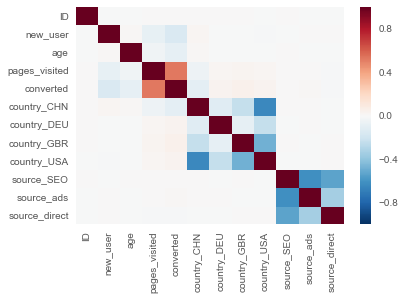

In [16]:
corr = df2.corr()
corr = (corr)
sns.heatmap(corr,
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values)

What you pick to include in your logistic regression depends on how you want to interpret your coefficients <br/>
Want to avoid multicollinearity

In [32]:
# http://blog.yhat.com/posts/logistic-regression-python-rodeo.html

train_cols = df2.columns
logit = sm.Logit(df2['converted'], df2[train_cols])
# When you do do one hot encoding
# you want to remove some 

result = logit.fit()
result.summary()

# ^ okay, the aboive gives me too much multi collinearity
# so try to remove the ones that cause
# the most overlap e.g. country US

         Current function value: 0.000000
         Iterations: 35


/Users/andrewyu/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               225293
Model:                          Logit   Df Residuals:                   225282
Method:                           MLE   Df Model:                           10
Date:                Tue, 24 Oct 2017   Pseudo R-squ.:                   1.000
Time:                        19:54:43   Log-Likelihood:             -0.0013260
converged:                      False   LL-Null:                       -32111.
                                        LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
ID             1.166e-06      0.000      0.003      0.998      -0.001       0.001
new_user         -0.9628     55.917     -0.017      0.986    -110.559     108.633
age               0.4195      7.544      0.056      0.956     -14.366      15.205
pages_visited    -0.0531      7.680     -0.007      0.994     -15.107      15.000
converted        65.3184   2.28e+04      0.003      0.998   -4.46e+04    4.47e+04
country_CHN     -11.6684   3.79e+09  -3.08e-09      1.000   -7.43e+09    7.43e+09
country_DEU     -20.0052   3.79e+09  -5.27e-09      1.000   -7.43e+09    7.43e+09
country_GBR     -31.8787   3.79e+09   -8.4e-09      1.000   -7.43e+09    7.43e+09
country_USA     -16.2958   3.79e+09   -4.3e-09      1.000   -7.43e+09    7.43e+09
source_SEO      -27.2012   3.79e+09  -7.17e-09      1.000   -7.43e+09    7.43e+09
source_ads      -26.1887   3.79e+09   -6.9e-09      1.000   -7.43e+09    7.43e+09
source_direct   -26.4582   3.79e+09  -6.97e-09      1.000   -7.43e+09    7.43e+09
=================================================================================

Complete Separation: The results show that there iscomplete separation.
In this case the Maximum Likelihood Estimator does not exist and the parameters
are not identified.
"""

In [ ]:
# Odds ratio, how the odds change for every unit

In [34]:
# remove country_USA and source_SEO cause there's probably most
# overlap there
train_cols = ['new_user', 'age', 'pages_visited', 'country_CHN', 'country_DEU', 'country_GBR', 'source_ads', 'source_direct']
logit = sm.Logit(df2['converted'], df2[train_cols])
# When you do do one hot encoding
# you want to remove some 

result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.053584
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               225293
Model:                          Logit   Df Residuals:                   225285
Method:                           MLE   Df Model:                            7
Date:                Tue, 24 Oct 2017   Pseudo R-squ.:                  0.6240
Time:                        19:58:12   Log-Likelihood:                -12072.
converged:                       True   LL-Null:                       -32111.
                                        LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
new_user         -2.2245      0.037    -60.029      0.000      -2.297      -2.152
age              -0.2500      0.002   -114.873      0.000      -0.254      -0.246
pages_visited     0.5935      0.005    108.380      0.000       0.583       0.604
country_CHN      -3.7724      0.135    -27.950      0.000      -4.037      -3.508
country_DEU       0.1023      0.076      1.345      0.179      -0.047       0.251
country_GBR      -0.0746      0.043     -1.715      0.086      -0.160       0.011
source_ads       -0.4869      0.041    -11.821      0.000      -0.568      -0.406
source_direct    -0.7087      0.047    -15.218      0.000      -0.800      -0.617
=================================================================================

Possibly complete quasi-separation: A fraction 0.31 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [35]:
  print np.exp(result.params)

new_user         0.108124
age              0.778816
pages_visited    1.810296
country_CHN      0.022998
country_DEU      1.107675
country_GBR      0.928147
source_ads       0.614548
source_direct    0.492266
dtype: float64


### Class imbalance 

http://www.chioka.in/class-imbalance-problem/

e.g. fraud detection


If we just use the data set that we have we are going to over predict on the non conversion

How do we fix this? We use **upsampling and downsampling** </br>
duplicating data
https://stats.stackexchange.com/questions/122409/why-downsample
https://stats.stackexchange.com/questions/199230/downsampling-vs-upsampling-on-the-significance-of-the-predictors-in-logistic-reg

In [38]:
result = smf.logit(formula = 'converted ~ new_user + age + pages_visited + new_user + age + pages_visited + country_DEU + country_GBR + country_USA + source_ads + source_direct ', data = df2).fit()

Optimization terminated successfully.
         Current function value: 0.040499
         Iterations 11


In [39]:
#Calculate Odds Ratio:
coefficients = result.params
confidence_int = result.conf_int()
confidence_int['OR'] = coefficients
confidence_int.columns = ['2.5%', '97.5%', 'OR']
print np.exp(confidence_int)

                    2.5%      97.5%         OR
Intercept       0.000021   0.000043   0.000030
new_user        0.160221   0.189089   0.174057
age             0.923133   0.933376   0.928240
pages_visited   2.107963   2.169865   2.138690
country_DEU    31.780588  59.376717  43.439924
country_GBR    27.733478  48.941587  36.841830
country_USA    20.026167  34.748809  26.379641
source_ads      0.959567   1.154302   1.052440
source_direct   0.781792   0.960429   0.866519


In [40]:
#Fuck it, switching to SKLEARN:
X = df2[ ['new_user', 'age', 'pages_visited', 'country_DEU', 'country_GBR', 'country_CHN', 'source_ads', 'source_direct' ] ]
c = df2.converted

model = linear_model.LogisticRegression(C = 10 ** 2).fit(X, c)

In [41]:
#Odds Ratios with SKLearn:
# TODO
print np.exp(model.intercept_)
print zip(X.columns, np.exp(model.coef_[0]))

[ 0.00079809]
[('new_user', 0.17407348587884611), ('age', 0.92831020578829171), ('pages_visited', 2.138920803170095), ('country_DEU', 1.6481967923821099), ('country_GBR', 1.3984970183316867), ('country_CHN', 0.038630810661049252), ('source_ads', 1.0556521810041306), ('source_direct', 0.86611895949716078)]


In [43]:
#Model is too good because there is a small percange of people who converted in the dataset
# that gives you 98.6% model
model.score(X, c)

0.98615580599486008